# Exercises, week 1

## Exercise 1

Write a program that asks for the user's name and then prints `HELLO`, followed by a comma, a space, the name with all letters being capital, and an exclamation mark.

Then extend the program to write the name with dashes between the characters.

Sample input and output:
```
What's your name? Homer HELLO, HOMER!
HELLO, H-O-M-E-R!
```

To convert a string to uppercase, you can use the upper method:
```python
x = "Test String"
print(x.upper())  # prints "TEST STRING"
```  

In [1]:
name = input("What's your name? ")
print("HELLO, " + name.upper() + "!")
print('HELLO, ' + '-'.join(list(name)).upper() + '!')

What's your name? Homer
HELLO, HOMER!
HELLO, H-O-M-E-R!


# Exercises, week 2

## Exercise 1

1. Write a program that will ask user for an amount in NOK and converts it to EUR (using the exchange rate 10.40 NOK/EUR).
   ```
   Amount in NOK: 1000
   1000.00 NOK = 96.15 EUR
   ```
1. Extend the program and add conversion from EUR to NOK. Let the user decide if they want to convert from NOK to EUR or vice versa.
1. Change the program so that the user enters the amount including the currency, and the program converts it to the other currency.
  ```
  Amount (incl. currency): 100 EUR
  1040.00 NOK = 100.00 EUR
  ```
1. (Extra challenge.) Add support for USD (9.91 NOK/USD).

In [2]:
# Part 1
rate_eur = 10.40
amount_nok = float(input('Amount in NOK: '))
amount_eur = amount_nok / rate_eur
print('{:.2f} NOK = {:.2f} EUR'.format(amount_nok, amount_eur))

Amount in NOK: 1000
1000.00 NOK = 96.15 EUR


In [3]:
# Part 2
rate_eur = 10.40
curr = input('What currency do you want to covert from? ')
amount = float(input('Amount: '))
curr = curr.strip().upper()  # `strip`` removes the white spaces from the beginning and the end
if curr == 'NOK' or curr == 'EUR':  # We could also use: curr in ['NOK', 'EUR']
    if curr == 'NOK':
        amount_nok = amount
        amount_eur = amount_nok / rate_eur
    else:
        amount_eur = amount
        amount_nok = amount_eur * rate_eur
    print('{:.2f} NOK = {:.2f} EUR'.format(amount_nok, amount_eur))
else:
    print('Unknown currency')

What currency do you want to covert from? EUR
Amount: 100
1040.00 NOK = 100.00 EUR


In [4]:
# Part 3
rate_eur = 10.40
amount_curr = input('Amount (incl. currency): ')
amount_curr_arr = amount_curr.split()
amount = float(amount_curr_arr[0])
curr = amount_curr_arr[1]
if curr == 'NOK' or curr == 'EUR':  # We could also use: curr in ['NOK', 'EUR']
    if curr == 'NOK':
        amount_nok = amount
        amount_eur = amount_nok / rate_eur
    elif curr == 'EUR':
        amount_eur = amount
        amount_nok = amount_eur * rate_eur
    print('{:.2f} NOK = {:.2f} EUR'.format(amount_nok, amount_eur))
else:
    print('Unknown currency')

Amount (incl. currency): 100 EUR
1040.00 NOK = 100.00 EUR


## Exercise 2

The sequence 0, 1, 1, 2, 3, 5, 8, 13, 21,... is called the Fibonacci sequence. The first two numbers are 0 and 1 and each following number is the sum of the two preceding ones.

Implement a function, named `fib_lte`, to generate and print the elements of the sequence less than or equal to the value passed to the function. Call the function to print all elements of the sequence less than or equal to 1000.

Then implement another function, named `fib_first`, to print the first n numbers, where n is the parameter of the function.

```
fib_lte(1000)
0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987

fib_first(10)
0 1 1 2 3 5 8 13 21 34
```

In [5]:
# Without using lists

def fib_lte(limit):
    previous = 0
    print(previous, end=" ")
    current = 1
    while current <= limit:
        print(current, end=" ")
        new = previous + current
        previous = current
        current = new
    print()


def fib_first(n):
    previous = 0
    print(previous, end=" ")
    current = 1
    for index in range(n-1):  # We have already printed out one, so we will run the loop n-1 times
        print(current, end=" ")
        new = previous + current
        previous = current
        current = new
    print()


fib_lte(1000)
fib_first(10)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 
0 1 1 2 3 5 8 13 21 34 


In [6]:
# We can simplify the previous solution a bit:

def fib_lte(limit):
    previous, current = 0, 1
    print(previous, end=" ")
    while current <= limit:
        print(current, end=" ")
        previous, current = current, previous + current
    print()


def fib_first(n):
    previous, current = 0, 1
    print(previous, end=" ")
    for index in range(n-1):
        print(current, end=" ")
        previous, current = current, previous + current
    print()


fib_lte(1000)
fib_first(10)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 
0 1 1 2 3 5 8 13 21 34 


In [7]:
# A solution with lists

def fib_lte(limit):
    seq = [0, 1]
    while seq[-2] + seq[-1] <= limit:
        seq.append(seq[-2] + seq[-1])
    print(seq)


def fib_first(n):
    seq = [0, 1]
    for _ in range(n-2):
        seq.append(seq[-2] + seq[-1])
    print(seq)


fib_lte(1000)
fib_first(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


# Exercises, week 3

## Exercise 1

Write a function that accepts a string and prints out a table showing its unique characters and for each character the number of occurrences.

Test your function with a few sample strings. For example, if the name of the function is `print_stats`, then `print_stats('banana')` will print:

```
b | 1 time(s)
a | 3 time(s)
n | 2 time(s)
```

Extra challenge: print the table sorted by the number of occurrences, from the most frequent character to the least frequent one.

In [11]:
def stats(string):
    counts = {}
    # The keys of the `counts`` dictionary will be the individual characters (that exist in `string`)
    # and the values how many times each character appeared in `string`
    # For example, if `string` is "banana", `counts` will be {"b": 1, "a": 3, "n": 2}
    for character in string:
        # We iterate over all characters in the `string`
        if character in counts:
            # If there is already the key `character` in `counts` (we have seen this character at least once)
            # we need to increase the corresponding value by 1:
            counts[character] += 1
        else:
            # Othewise, the key `character` does not exist in `counts` (we have not seen this character yet)
            # so we need to add the key and set the value to 1:
            counts[character] = 1
    return counts


# Shorter version, using the dict.get method:
# def stats(string):
#     counts = {}
#     for character in string:
#         counts[character] = counts.get(character, 0) + 1
#     return counts


def print_stats(string):
    counts = stats(string)
    for character, count in counts.items():
        print(character, "|", count, "time(s)")


# Extra challenge:
# def print_stats(string):
#     counts = stats(string)
#     sorted_items = sorted(counts.items(), key=lambda key_value_tuple: key_value_tuple[1], reverse=True)
#     for character, count in sorted_items:
#         print(character, "|", count, "time(s)")


print_stats('banana')
#print_stats('Hello, world!')

a | 3 time(s)
n | 2 time(s)
b | 1 time(s)


## More exercises?

- Try solving the problems uploaded under Resources / Problem sets.
- **Highly recommended:** Register and solve exercises at https://codewars.com.
- You can also look at the exercises at https://practicepython.org.

# Exercises, week 4

## Exercise 1

In shakespeare_sonnets.txt you will find the text of the first three sonnets by William Shakespeare. Write a program to answer the following questions:

- How many words are there in the text? (Answer: 336)
- How many unique words are there in the text?
- What is the most frequent word?
- Extra challenge: Which three words are the most frequent and how many times they have occurred in the text?

There are some words that contain `'` or `-` inside. Keep these words as they are, e.g. keep
*self-substantial* instead of splitting it to *self* and *substantial*.

Notes:

- Pay attention to newlines, quotes (`'`) and punctuation marks (`.`, `?`, `!`, `;` and `:`).
- Hello and hello are the same word.

In [4]:
with open('shakespeare_sonnets.txt') as file:
    contents = file.read().lower()
words = contents.split()
word_counts = {}
for word in words:
    word = word.strip(".?!,;:'")
    word_counts[word] = word_counts.get(word, 0) + 1

max_count = 0
for word, count in word_counts.items():
    if count > max_count:
        max_count = count
        most_frequent_word = word

print("Number of words: {}".format(len(words)))
print("Number of unique words: {}".format(len(word_counts)))
print("The most common word: {} ({} times)".format(most_frequent_word, max_count))

# Extra challenge:
print("The most common words:")
for word in sorted(word_counts, key=word_counts.get, reverse=True)[:3]:
    print("- {}: {} times".format(word, word_counts[word]))

Number of words: 336
Number of unique words: 197
The most common word: thy (16 times)
The most common words:
- thy: 16 times
- the: 13 times
- thou: 11 times


## Exercise 2

In words.txt you will find an English dictionary with 113809 words (one word per line, all words are lowercase).
Find out:
- how many of these words are palindromes, i.e. words that read the same backward and forward, for example *rotator*,
- how many of these words are anadromes, i.e. words that you get by reversing the spelling of another word, e.g. *pot* (reversed *top*), do not include palindromes,
- how many vowels and how many consonants are there in total (in all words). Note: in English y is sometimes a vowel and sometimes a consonant, but in this exercise consider all occurrences of y to be vowels.

In [2]:
with open('words.txt') as file:
    words = file.read().split()

# To speed up checking if a given word is in the dictionary, we convert the list to a set.
words = set(words)

count_palindromes = 0
count_anadromes = 0
total_vowels = 0
total_consonants = 0

for word in words:
    word_rev = word[::-1]
    if word == word_rev:
        count_palindromes += 1
    elif word_rev in words:
        count_anadromes += 1
    for letter in word:
        if letter in "aeiouy":
            total_vowels += 1
        else:
            total_consonants += 1

print("Palindromes: {:6d}".format(count_palindromes))
print("Anadromes:   {:6d}".format(count_anadromes))
print("Vowels:      {:6d}".format(total_vowels))
print("Consonants:  {:6d}".format(total_consonants))

Palindromes:     91
Anadromes:      794
Vowels:      351928
Consonants:  550977


# Exercises, week 5

## Exercise 1

Given a group of *n* people, what is the probability that at least two people in the group will celebrate the birthday on the same day?

It might sound surprising that even in a small group with *n* = 23 people, the probability is over 50%. With *n* = 70 people, the probability is close to 99.9%.

Write a Python function that accepts n and estimates this probability for a group of n people using the Monte Carlo method. Specifically:

- Sample the birthdays of n people uniformly at random and check if there are at least two people who have birthday the same day.
- Repeat this experiment 100 000 times and estimate the probability as the number of how many times you found at least two people having birthday the same day divided by 100 000.

In [1]:
import random
import numpy as np
import numpy.random as npr


def birthday_probability(n):
    # One-liner
    # return np.mean([np.unique(row).size < n for row in np.random.randint(1, 366, (100000, n))])

    # A solution with loops:
    count_exps = 100000
    count_succ = 0
    for _ in range(count_exps):
        # Using numpy.random:
        birthdays = npr.randint(1, 366, n)
        # Alternative way using the random module:
        # birthdays = [random.randint(1, 365) for i in range(n)]
        if len(set(birthdays)) < n:
            count_succ += 1
    return count_succ / count_exps


print("n = 23: {:.5f} (should be slightly above 0.5)".format(birthday_probability(23)))
print("n = 70: {:.5f} (should be close to 0.999)".format(birthday_probability(70)))

n = 23: 0.50636 (should be slightly above 0.5)
n = 70: 0.99930 (should be close to 0.999)


## Exercise 2

Write a program in which the computers plays the Bulls and Cows game with the user.

The computer generates a secret 4-digit number with all digits being different.

The user repeatedly tries to guess the number, receiving feedback on how many digits are correct and in their right positions (”bulls”) and how many digits are correct but in wrong positions (”cows”).

For example, if the secret number is 5273 and the user enters 7234, the feedback is 1 bull and 2 cows. (1 bull is the digit 2, and 2 cows are the digits 3 and 7.)

A game ends when the user succeeds to guess the secret number.

You can read more about the game on Wikipedia: https://en.wikipedia.org/wiki/Bulls_and_Cows

In [ ]:
import random


while True:
    secret = random.randint(1000, 9999)   # Random integer between 1000 and 9999 (incl.)
    secret_str = str(secret)              # The secret number as a string
    secret_digits = set(secret_str)       # A set of digits as strings (e.g. if secret is 5382, the set is {"2", "3", "5", "8"})
    if len(secret_digits) == 4:           # We are repeating the loop until we find a number with 4 different digits
        break


while True:
    guess_str = input('Guess the number: ').strip()
    guess_digits = set(guess_str)
    if len(guess_str) != 4:
        print("It must be a 4 digit number!")
        continue
    if len(guess_digits) != 4:
        print("It must have different digits!")
        continue
    
    if guess_str == secret_str:
        print('Yes, that is correct!')
        break

    # We need to count the number of bulls and cows:
    bulls = cows = 0
    for idx in range(4):
        if guess_str[idx] == secret_str[idx]:
            bulls += 1
        elif guess_str[idx] in secret_str:
            cows += 1

    # Alternative way how to find the number of bulls and cows:
    # bulls = sum(1 for i in range(4) if secret_str[i] == guess_str[i])
    # cows = len(guess_digits & secret_digits) - bulls   # & = a set intersection

    print('Bulls: {}, cows: {}'.format(bulls, cows))

# Exercises, week 6

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns when printing/displaying data frames
%matplotlib inline

## Complaints in New York City

In the USA, 311 is a non-emergency phone number that people can call in many cities to find information about services, make complaints, or report problems like graffiti or road damage. The data about these calls is open to the public. In this exercise we are going to use a subset of the data for New York City.

- Read in the CSV file *complaints.csv*. Use the `Unique Key` column as the index.

In [2]:
complaints_df = pd.read_csv('complaints.csv', index_col='Unique Key', low_memory=False)
complaints_df

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors

- How many observations and columns are there in (our subset of) the data set?

In [3]:
print('Number of observations:', len(complaints_df))
print('Number of variables:', len(complaints_df.columns))

# Or:
# print('Number of observations:', complaints_df.shape[0])
# print('Number of variables:', complaints_df.shape[1])

Number of observations: 111069
Number of variables: 51


- What is the complaint type for the complaint 26437546?

In [4]:
complaints_df.loc[26437546, "Complaint Type"]

'Water System'

- Select the first 20 rows.

In [5]:
complaints_df.head(20)

# Or:
# complaints_df.iloc[:20]

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,U

- Select the second hundred of rows.

In [6]:
complaints_df.iloc[100:200]

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Unique Key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26594657,10/30/2013 11:31:51 PM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11229,2002 EAST 13 STREET,EAST 13 STREET,AVENUE T,AVENUE U,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Open,10/31/2013 07:31:51 AM,NaN,15 BROOKLYN,BROOKLYN,995740.0,158062.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.600513,-73.958624,"(40.60051250977975, -73.95862361000808)"
26592215,10/30/2013 11:31:38 PM,NaN,NYPD,New York City Police Department,Panhandling,NaN,Street/Sidewalk,11418,135-16 JAMAICA AVENUE,JAMAICA AVENUE,METROPOLITAN AVENUE,VAN WYCK EXPRESSWAY,NaN,NaN,ADDRESS,RICHMOND HILL,NaN,Precinct,Open,10/31/2013 07:31:38 AM,NaN,09 QUEENS,QUEENS,1034900.0,195238.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702415,-73.817326,"(40.70241501845674, -73.81732645592662)"
26595950,10/30/2013 11:31:30 PM,NaN,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11215,804 PRESIDENT STREET,PRESIDENT STREET,6 AVENUE,7 AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Assigned,10/31/2013 07:31:30 AM,10/30/2013 11:42:31 PM,06 BROOKLYN,BROOKLYN,990758.0,184860.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674072,-73.976538,"(40.67407235682811, -73.97653833445541)"
26591346,10/30/2013 11:30:54 PM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10027,3155 BROADWAY,BROADWAY,LA SALLE STREET,TIEMANN PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Assigned,10/31/2013 07:30:54 AM,10/30/2013 11:36:10 PM,09 MANHATTAN,MANHATTAN,995559.0,236037.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.814536,-73.959144,"(40.81453554135292, -73.95914444206745)"
26593903,10/30/2013 11:30:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,10065,210 EAST 67 STREET,EAST 67 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Pending,11/29/2013 11:30:37 PM,10/30/2013 11:32:56 PM,08 MANHATTAN,MANHATTAN,994655.0,218478.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.766342,-73.962437,"(40.76634192531301, -73.96243748655138)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26591076,10/30/2013 10:31:11 PM,10/31/2013 12:40:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10452,1565 TOWNSEND AVENUE,TOWNSEND AVENUE,EAST 172 STREET,EAST MT EDEN AVE

- Select the (created) date, complaint type and incident ZIP for the complaints 26595721, 26589299 and 26592600.

In [7]:
complaints_df.loc[[26595721, 26589299, 26592600], ['Created Date', 'Complaint Type', 'Incident Zip']]

,Created Date,Complaint Type,Incident Zip
Unique Key,,,
26595721,10/31/2013 01:56:23 AM,Noise - Vehicle,10023
26589299,10/30/2013 06:27:00 PM,Street Light Condition,11416
26592600,10/30/2013 12:43:00 PM,Street Light Condition,NaN


- How many complaints have been reported in each of the NYC boroughs? Hint: You might use the `value_counts` method.

In [8]:
complaints_df['Borough'].value_counts()

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

- How many illegal parkings have been reported in each borough?

In [9]:
complaints_df[complaints_df['Complaint Type']=='Illegal Parking']['Borough'].value_counts()

# Or:
# complaints_df.query("`Complaint Type`=='Illegal Parking'")['Borough'].value_counts()

BROOKLYN         1147
QUEENS            887
MANHATTAN         640
BRONX             391
STATEN ISLAND     278
Name: Borough, dtype: int64

## Melbourne housing

In this exercise we will work with a dataset on the housing market in Melbourne.

- Read in the CSV file *melbourne.csv*.

In [10]:
housing_df = pd.read_csv("melbourne.csv")
housing_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


- Select the first 10 rows.

In [11]:
housing_df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


- Use the `info` method to print the information about the data frame.

In [12]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

- How many observations (rows) are there in total? How many attributes (columns) are stored for each real estate property?

In [13]:
print("Number of observations:", len(housing_df))
print("Number of attributes:", len(housing_df.columns))

# Or:
# print("Number of observations:", housing_df.shape[0])
# print("Number of attributes:", housing_df.shape[1])

Number of observations: 34857
Number of attributes: 21


- Change the `Type` column to a categorical column and the `Date` column to a date-time column.

  Note that the date format is d/m/y and we need to specify this when changing the type, otherwise some of the dates will be converted incorrectly (the m/d/Y format will be assumed for them).

In [14]:
housing_df['Type'] = housing_df['Type'].astype('category')

housing_df['Date'] = pd.to_datetime(housing_df['Date'], dayfirst=True)
# Or:
# housing_df['Date'] = pd.to_datetime(housing_df['Date'], format='%d/%m/%Y')

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

- What happens if you try to change the data type of the `Bathroom` column to *int*. Why?

In [15]:
try:
    housing_df['Bathroom'].astype('int')
except Exception as e:
    print(e)

Cannot convert non-finite values (NA or inf) to integer


- How many houses (type `h`), units (`u`) and townhouses (`t`) are there in the data set? Visualize the distribution as a pie chart (hint: use `s.plot.pie()` where `s` is a Pandas series).

h    23980
u     7297
t     3580
Name: Type, dtype: int64


<AxesSubplot:ylabel='Type'>

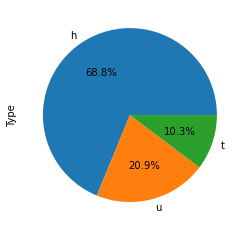

In [16]:
counts = housing_df['Type'].value_counts()
print(counts)
counts.plot.pie(autopct='%.1f%%')

- Add a column to the dataset with the `Date`'s year and name it `Year`.

In [17]:
housing_df['Year'] = housing_df['Date'].dt.year
housing_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,2016
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2016
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,2018
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,2018
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,2018
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,2018


- Create a subset of the data consisting of the columns Year, Suburb, Price, Rooms, Type, Bathroom, Car, Landsize, BuildingArea and YearBuilt.

In [18]:
housing_df2 = housing_df[['Year', 'Suburb', 'Price', 'Rooms', 'Type', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
housing_df2

,Year,Suburb,Price,Rooms,Type,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,2016,Abbotsford,NaN,2,h,1.0,1.0,126.0,NaN,NaN
1,2016,Abbotsford,1480000.0,2,h,1.0,1.0,202.0,NaN,NaN
2,2016,Abbotsford,1035000.0,2,h,1.0,0.0,156.0,79.0,1900.0
3,2016,Abbotsford,NaN,3,u,2.0,1.0,0.0,NaN,NaN
4,2017,Abbotsford,1465000.0,3,h,2.0,0.0,134.0,150.0,1900.0
...,...,...,...,...,...,...,...,...,...,...
34852,2018,Yarraville,1480000.0,4,h,1.0,3.0,593.0,NaN,NaN
34853,2018,Yarraville,888000.0,2,h,2.0,1.0,98.0,104.0,2018.0
34854,2018,Yarraville,705000.0,2,t,1.0,2.0,220.0,120.0,2000.0
34855,2018,Yarraville,1140000.0,3,h,NaN,NaN,NaN,NaN,NaN


- Print the summary statistics for these attributes.

In [19]:
housing_df2.describe().round(2)

,Year,Price,Rooms,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,34857.00,27247.00,34857.00,26631.00,26129.00,23047.00,13742.00,15551.00
mean,2016.84,1050173.34,3.03,1.62,1.73,593.60,160.26,1965.29
std,0.64,641467.13,0.97,0.72,1.01,3398.84,401.27,37.33
min,2016.00,85000.00,1.00,0.00,0.00,0.00,0.00,1196.00
25%,2016.00,635000.00,2.00,1.00,1.00,224.00,102.00,1940.00
50%,2017.00,870000.00,3.00,2.00,2.00,521.00,136.00,1970.00
75%,2017.00,1295000.00,4.00,2.00,2.00,670.00,188.00,2000.00
max,2018.00,11200000.00,16.00,12.00,26.00,433014.00,44515.00,2106.00


- Show the most 10 expensive properties.

In [20]:
housing_df2.sort_values('Price', ascending=False).head(10)

,Year,Suburb,Price,Rooms,Type,Bathroom,Car,Landsize,BuildingArea,YearBuilt
25635,2017,Brighton,11200000.0,4,h,3.0,2.0,1400.0,NaN,NaN
19583,2017,Mulgrave,9000000.0,3,h,1.0,1.0,744.0,117.0,1960.0
12539,2017,Canterbury,8000000.0,5,h,5.0,4.0,2079.0,464.3,1880.0
15696,2017,Hawthorn,7650000.0,4,h,2.0,4.0,1690.0,284.0,1863.0
28334,2017,Armadale,7000000.0,4,h,NaN,NaN,NaN,NaN,NaN
20924,2017,Armadale,6800000.0,4,h,2.0,2.0,NaN,NaN,NaN
30551,2017,Malvern,6600000.0,5,h,3.0,2.0,NaN,465.0,1940.0
25204,2017,Melbourne,6500000.0,3,u,NaN,NaN,NaN,NaN,NaN
5937,2016,Kew,6500000.0,6,h,6.0,3.0,1334.0,365.0,1890.0
16003,2017,Toorak,6460000.0,4,h,NaN,NaN,NaN,NaN,NaN


- What is the average price? What is the maximum number of rooms? What is the average number of baths? Are there bathrooms in all properties? In which year was the newest property built? (Comment on the answer to the last question.)

In [21]:
print("Average price: {:.2f}".format(
    housing_df2['Price'].mean()
))
print("Maximum number of rooms: {:d}".format(
    housing_df2['Rooms'].max()
))
print("Average number of baths: {:.2f}".format(
    housing_df2['Bathroom'].mean()
))
print("Number of properties without bathroom: {:d}".format(
    # len(housing_df2[housing_df2['Bathroom']==0])
    # Or:
    (housing_df2['Bathroom']==0).sum()
))
print("Year when the newest property was built: {:d}".format(
    int(housing_df2['YearBuilt'].max())
))

Average price: 1050173.34
Maximum number of rooms: 16
Average number of baths: 1.62
Number of properties without bathroom: 46
Year when the newest property was built: 2106


- What were the average prices in 2016, 2017 and 2018?

In [22]:
for year in [2016, 2017, 2018]:
    print("Average price in {:d}: {:.2f}".format(
        year,
        housing_df2.loc[housing_df2['Year']==year, 'Price'].mean()
    ))

Average price in 2016: 1063226.51
Average price in 2017: 1051144.06
Average price in 2018: 1017458.41


- What is the average price for all properties with at least three rooms and at least two bathrooms in the Newport area? How many such properties are in this area?

In [23]:
prices = housing_df2.query("Rooms >= 3 and Bathroom >= 2 and Suburb == 'Newport'")['Price']
# Or:
# prices = housing_df2.loc[
#     (housing_df2["Rooms"] >= 3) & (housing_df2["Bathroom"] >= 2) & (housing_df2["Suburb"]=='Newport'),
#     'Price'
# ]

print("Average property price: {:.2f}".format(
    prices.mean()
))

print("Number of properties: {:d}".format(
    len(prices)
))

Average property price: 1178301.32
Number of properties: 90


## Tesla stock prices

Moved to a homework problem set.

## Exercises, week 7

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns when printing/displaying data frames
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 5)    # Sets the width and height for plots

## Brand sales

In this exercise we will investigate the brand sales of an online retailer of mens clothing. The company operates in the mid to high end segment, offering a wide range of items and brands to their customers via online solutions.

Solve the following tasks:

- Import the dataset fashion.csv. Use the date column as the index and make sure to parse the dates on import.

In [2]:
brand_df = pd.read_csv('fashion.csv', index_col='Date', parse_dates=['Date'])
brand_df.head().round(2)

,Amanda_Christensen,Calvin_Klein,Eton,J_Lindeberg,Lacoste,Levi_s,Oscar_Jacobson,Ray_Ban,Tiger_of_Sweden
Date,,,,,,,,,
2014-07-01,5744.00,29976.0,78835.13,89833.85,65226.40,63884.8,18971.81,NaN,287420.57
2014-08-01,7372.80,33969.0,98835.05,153530.89,43368.68,57153.6,48796.80,NaN,322481.83
2014-09-01,8881.00,28602.0,70640.00,146138.46,26553.20,47048.0,37864.27,NaN,263211.05
2014-10-01,10693.22,23257.0,70230.18,151481.85,37045.60,33032.0,23762.00,NaN,295135.54
2014-11-01,17121.80,29817.0,96073.75,180756.00,35666.80,25476.0,41173.60,NaN,328531.02


- One of the monthly sales is negative, find it and replace it with a missing value.

In [3]:
brand_df[brand_df < 0] = np.nan

- Summarize the sales by year and brand.

In [4]:
brand_df.groupby(brand_df.index.year).sum().round(2)

,Amanda_Christensen,Calvin_Klein,Eton,J_Lindeberg,Lacoste,Levi_s,Oscar_Jacobson,Ray_Ban,Tiger_of_Sweden
Date,,,,,,,,,
2014,84134.41,189359.50,557870.47,866157.66,241657.08,252555.20,218397.95,0.00,2016674.81
2015,167430.13,594100.39,1428273.96,2117095.30,640789.46,85558.40,607636.00,354573.44,3659951.00
2016,191031.00,1058004.31,1864815.16,2952877.94,880957.71,0.00,836634.09,635821.62,3477013.12
2017,250064.91,1223611.24,2175277.51,3311647.64,1068541.31,565751.36,1061889.29,643401.40,3283572.97
2018,155101.88,1227814.79,1659610.22,1881761.22,1010484.78,3021841.01,873354.43,582513.53,1999529.00


- Summarize the sales by year.

In [5]:
brand_df.groupby(brand_df.index.year).sum().sum(axis=1).round(2)

Date
2014     4426807.08
2015     9655408.07
2016    11897154.94
2017    13583757.63
2018    12412010.85
dtype: float64

- Which brand had the largest monthly sales and when? (Hint: try to call the `unstack` method on the dataset and check out the result.)

In [6]:
brand_unstacked_df = brand_df.unstack()
# display(brand_unstacked_df)  # Uncomment to see what `unstack` does.

print('The largest sale:', brand_unstacked_df.max())

# Note: .idxmax() returns the label where the maximum is (it is a tuple, consisting of the brand name and date)
idx = brand_unstacked_df.idxmax()
print('Brand:', idx[0])
print('Month:', idx[1])

The largest sale: 519894.808000004
Brand: Tiger_of_Sweden
Month: 2014-12-01 00:00:00


- Create a stacked area chart of the monthly sales.

<AxesSubplot:xlabel='Date'>

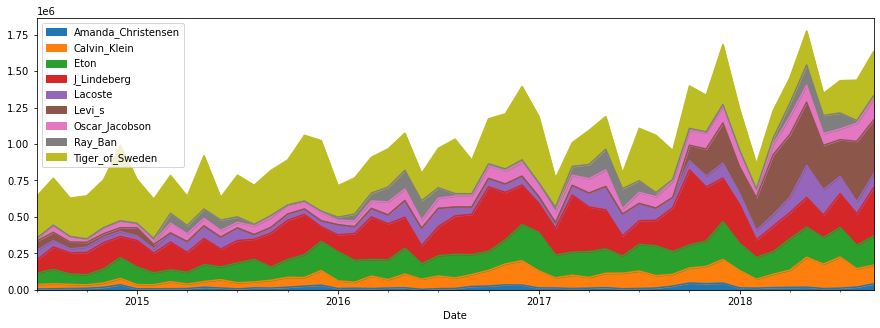

In [7]:
brand_df.plot.area()

- Create a pie chart of the sales of individual brands in 2018.

Text(0, 0.5, '')

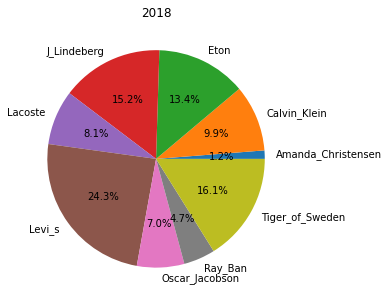

In [8]:
brand_df.loc['2018'].sum().plot.pie(autopct='%.1f%%')
plt.title('2018')
plt.ylabel(None)

## US National Parks and their animal and plant species

The National Park Service publishes a database of animal and plant species identified in individual national parks and verified by evidence — observations, vouchers, or reports that document the presence of a species in a park. All park species records are available to the public on the National Park Species portal; exceptions are made for sensitive, threatened, or endangered species when widespread distribution of information could pose a risk to the species in the park.

National Park species lists provide information on the presence and status of species in US national parks. These species lists are works in progress and the absence of a species from a list does not necessarily mean the species is absent from a park. The time and effort spent on species inventories varies from park to park, which may result in data gaps. Species taxonomy changes over time and reflects regional variations or preferences; therefore, records may be listed under a different species name.

Each park species record includes a species ID, park name, taxonomic information, scientific name, one or more common names, record status, occurrence (verification of species presence in park), nativeness (species native or foreign to park), abundance (presence and visibility of species in park), seasonality (season and nature of presence in park), and conservation status (species classification according to US Fish & Wildlife Service). Taxonomic classes have been translated from Latin to English for species categorization; order, family, and scientific name (genus, species, subspecies) are in Latin.

Solve the following taks:

- Import data on US parks (parks.csv)

In [9]:
parks_df = pd.read_csv('parks.csv')
parks_df.sample(10)

,Park Code,Park Name,State,Acres,Latitude,Longitude
53,YELL,Yellowstone National Park,"WY, MT, ID",2219791,44.60,-110.50
24,GRSM,Great Smoky Mountains National Park,"TN, NC",521490,35.68,-83.53
14,DENA,Denali National Park and Preserve,AK,3372402,63.33,-150.50
28,HAVO,Hawaii Volcanoes National Park,HI,323431,19.38,-155.20
13,CUVA,Cuyahoga Valley National Park,OH,32950,41.24,-81.55
40,NOCA,North Cascades National Park,WA,504781,48.70,-121.20
47,SEKI,Sequoia and Kings Canyon National Parks,CA,865952,36.43,-118.68
36,LAVO,Lassen Volcanic National Park,CA,106372,40.49,-121.51
41,OLYM,Olympic National Park,WA,922651,47.97,-123.50
50,VOYA,Voyageurs National Park,MN,218200,48.50,-92.88


- How many acres of national parks are there per state in the US? Make a top 5 list. 

In [10]:
parks_df.groupby('State')["Acres"].sum().sort_values(ascending=False).head(5)

# Or:
# parks_df.groupby('State').agg(acres_sum=('Acres', 'sum')).sort_values("acres_sum", ascending=False).head(5)

# Or:
# parks_df.groupby('State')["Acres"].sum().nlargest(5)

State
AK            31159251
CA, NV         4740912
CA             2912014
WY, MT, ID     2219791
FL             1746163
Name: Acres, dtype: int64

- Do you see any problems with the data quality here?

Some parks, like Yellowstone National Park, resides in three states (Wyoming, Montana and Idaho).
The number of acres has not been divided among the three states, resulting in non-unique state items.

- Import data on species (species.csv) and create a subset of the data consisting of 'Park Name', 'Scientific Name', 'Family', 'Occurrence', 'Nativeness' and 'Abundance'.

In [11]:
species_df = pd.read_csv('species.csv', low_memory=False)
species_df = species_df[['Park Name', 'Scientific Name', 'Family', 'Occurrence', 'Nativeness', 'Abundance']]
species_df.sample(10)

,Park Name,Scientific Name,Family,Occurrence,Nativeness,Abundance
77106,Mesa Verde National Park,Corynorhinus townsendii,Vespertilionidae,Present,Native,Unknown
96235,Rocky Mountain National Park,Lomographa semiclarata,Geometridae,Present,NaN,Unknown
13580,Carlsbad Caverns National Park,Zonotrichia albicollis,Emberizidae,Present,Native,Unknown
19912,Crater Lake National Park,Silene menziesii,Caryophyllaceae,Present,Native,Unknown
60011,Hawaii Volcanoes National Park,Metopograpsus thukuhar,Grapsidae,Present,Native,Unknown
17020,Congaree National Park,Clemmys guttata,Emydidae,Present,Native,Unknown
6767,Biscayne National Park,Chlorophthalmus agassizi,Chlorophthalmidae,Not Present (False Report),Native,NaN
18488,Congaree National Park,Euchlaena amoenaria,Geometridae,Present,NaN,NaN
45065,Great Sand Dunes National Park and Preserve,Campanula uniflora,Campanulaceae,Present,Native,Unknown
3349,Badlands National Park,Mirabilis nyctaginea,Nyctaginaceae,Present,Native,Uncommon


- How many unique species (i.e. species with different scientific name) are there per national park? Which park has the most unique species? Make a top 10 and bottom 10 list.

In [12]:
species_by_park = species_df.groupby('Park Name') \
                            .agg(unique_species=('Scientific Name', 'nunique')) \
                            .sort_values('unique_species', ascending=False)

# Alternatively:
# species_by_park = species_df.groupby('Park Name')['Scientific Name'].agg('nunique').sort_values(ascending=False)

display(species_by_park.head(10))  # Instead of .head(10) we can use .iloc[:10]
display(species_by_park.tail(10))  # Instead of .tail(10) we can use .iloc[-10:]

,unique_species
Park Name,
Great Smoky Mountains National Park,6616
Redwood National Park,6241
Shenandoah National Park,4634
Death Valley National Park,4437
Yellowstone National Park,3963
Crater Lake National Park,3757
North Cascades National Park,3363
Hawaii Volcanoes National Park,3298
Rocky Mountain National Park,3136


,unique_species
Park Name,
Canyonlands National Park,1223
Katmai National Park and Preserve,1223
Theodore Roosevelt National Park,1165
Black Canyon of the Gunnison National Park,1106
Kenai Fjords National Park,1055
Arches National Park,1048
Kobuk Valley National Park,1024
Great Sand Dunes National Park and Preserve,952
Petrified Forest National Park,853


- Merge the park data with the species data. Verify that the merged data looks correct by inspecting 10 randomly selected records.

In [13]:
species_parks_df = pd.merge(species_df, parks_df, left_on='Park Name', right_on='Park Name')
species_parks_df.sample(10)

,Park Name,Scientific Name,Family,Occurrence,Nativeness,Abundance,Park Code,State,Acres,Latitude,Longitude
17371,Congaree National Park,Dioscorea floridana,Dioscoreaceae,Present,Native,Uncommon,CONG,SC,26546,33.78,-80.78
95294,Rocky Mountain National Park,Cystopteris fragilis,Woodsiaceae,Present,Native,Uncommon,ROMO,CO,265828,40.40,-105.58
93905,Redwood National Park,Pelvetiopsis,Fucaceae,NaN,NaN,NaN,REDW,CA,112512,41.30,-124.00
116815,Yosemite National Park,Viola lobata ssp. lobata,Violaceae,Present,Native,Common,YOSE,CA,761266,37.83,-119.50
48554,Great Smoky Mountains National Park,Plagiothecium laetum,Plagiotheciaceae,Present,Native,Uncommon,GRSM,"TN, NC",521490,35.68,-83.53
99888,Sequoia and Kings Canyon National Parks,Cornus nuttallii,Cornaceae,Present,Native,Common,SEKI,CA,865952,36.43,-118.68
89521,Redwood National Park,Acacia mearnsii,Fabaceae,Present,Not Native,Occasional,REDW,CA,112512,41.30,-124.00
54075,Grand Teton National Park,Zavrelimyia,Chironomidae,Present,Unknown,Unknown,GRTE,WY,309995,43.73,-110.80
90953,Redwood National Park,Corallina,Corallinaceae,NaN,NaN,NaN,REDW,CA,112512,41.30,-124.00
97983,Saguaro National Park,Mirabilis coccinea,Nyctaginaceae,Present,Native,Unknown,SAGU,AZ,91440,32.25,-110.50


- How many unique species are currently living (i.e. have `Occurrence` equal to `Present`) in each state?

In [14]:
species_parks_df.loc[species_parks_df['Occurrence'] == 'Present'].groupby('State').agg({'Scientific Name': 'nunique'})

# Or:
# species_parks_df.query("Occurrence == 'Present'").groupby('State').agg({'Scientific Name': 'nunique'})

# Alternatively:
# species_parks_df[species_parks_df.Occurrence == 'Present'].groupby('State')['Scientific Name'].nunique()
# or .agg('nunique') instead of .nunique()

,Scientific Name
State,
AK,2655
AR,680
AZ,3552
CA,5666
"CA, NV",1470
CO,3957
FL,2328
HI,3895
KY,1941


# In-class exercises (week 11)

If you use MacOS, Linux or other UNIX-based operating system, run the following cell:

In [ ]:
!cp sqltutorial.db sqltutorial_copy.db

If you use Windows, run the following cell instead:

In [ ]:
!copy sqltutorial.db sqltutorial_copy.db

## Exercise 1

Write a program that shows a list of IDs and names of all employees, sorted by their name.

The first lines should look as follows:
```
 1 | Alnes, Bernt
 7 | Bakke, Alfred
 6 | Bodin, Runar
12 | Dyrhaug, Atle
 2 | Fjelldal, Mads
```

Note: Use the copied database!

In [ ]:
import sqlite3 as db

conn = db.connect("sqltutorial_copy.db", isolation_level=None)
conn.execute("PRAGMA foreign_keys = 1")  

cursor = conn.cursor()

cursor.execute("""
SELECT id, last_name, first_name
FROM employee
ORDER BY last_name, first_name
""")
for id_, last_name, first_name in cursor:
    print("{:2d} | {}, {}".format(id_, last_name, first_name))

cursor.close()
conn.close()

## Exercise 2

Write a program that asks the user to enter the ID of an employee, and then prints all information about that employee as shown below: 

```
Kvien, Amalie
Department: Sales and administration
Hour salary: 205.00
--------------------------------------------------
Project Bravo, Knivsta              15.00 hours
Project Charlie, Stockholm          75.00 hours
--------------------------------------------------
Total:           90.00 hours
Total cost:   18450.00
```

Note: Use the copied database!

In [ ]:
import sqlite3 as db

conn = db.connect("sqltutorial_copy.db", isolation_level=None)
conn.execute("PRAGMA foreign_keys = 1")  

cursor = conn.cursor()

employee_id = input('Enter the employee ID: ')
cursor.execute("""
    SELECT last_name, first_name, title, hour_salary
    FROM employee
    JOIN department ON employee.department_id=department.id
    WHERE employee.id = ?
""", (employee_id,))
row = cursor.fetchone()
if row:
    last_name, first_name, department_title, hour_salary = row
    print("{}, {}".format(last_name, first_name))
    print("Department: {}".format(department_title))
    print("Hour salary: {:.2f}".format(hour_salary))
    print("-" * 50)
    cursor.execute("""
        SELECT title, hours_spent
        FROM employee_project
        JOIN project ON employee_project.project_id=project.id
        WHERE employee_id = ?
    """, (employee_id,))
    total_hours_spent = 0
    for row2 in cursor:
        project_title, hours_spent = row2
        print("{:30} {:10.2f} hours".format(project_title, hours_spent))
        total_hours_spent += hours_spent
    print("-" * 50)
    print("Total:      {:10.2f} hours".format(total_hours_spent))
    print("Total cost: {:10.2f}".format(total_hours_spent*hour_salary))
else:
    print("No such employee")

cursor.close()
conn.close()

## Exercise 3

Write a program that asks the user to enter the ID of an employee and their new hour salary, and then updates the data in the database. Use the program from Exercise 2 to verify that your program works.

Note: Use the copied database!

In [ ]:
import sqlite3 as db

conn = db.connect("sqltutorial_copy.db", isolation_level=None)
conn.execute("PRAGMA foreign_keys = 1")  

cursor = conn.cursor()

employee_id = input('Enter the employee ID: ')
hour_salary = input('Enter the new hour salary: ')

cursor.execute("UPDATE employee SET hour_salary=? WHERE id=?", (hour_salary, employee_id))

cursor.close()
conn.close()